# Laboratory #3 : Face detection and recognition

At the end of this laboratory, you would get familiarized with

*   Face detection
    *   Integral images
    *   Haar-like feature computation
    *   Adaboost 
*   Face recognition
    *   Eigen Faces
    *   PCA and LDA

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Mount your drive to access the images.
*   Add sufficient comments and explanations wherever necessary.

---

In [ ]:
# mount drive to the notebook

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Face Detection using AdaBoost

In [ ]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from skimage import data, io
import os
import matplotlib
from PIL import Image
from multiprocessing import Pool
from functools import partial
import time
import timeit
from matplotlib import pyplot as plt

### Exercise #1

*   Build a function compute_integral_image that computes the integral image of an input (2D) array. In an integral image each pixel is the sum of all pixels in the original image that are 'left and above' the pixel. See the following example:

```
Original    Integral
+--------   +------------
| 1 2 3 .   | 0  0  0  0 .
| 4 5 6 .   | 0  1  3  6 .
| . . . .   | 0  5 12 21 .
            | . . . . . .
```

*   The integral image must have an additional row and column full of zeros (first row and first column).
*   Plot the output of the integral image for the following array:

```
img_array = np.array([[1,2,2,2,1],[1,2,2,2,1],[1,2,2,2,1],[1,2,2,2,1]])
```

In [ ]:
def compute_integral_image(img_arr):
    """
    Calculates the integral image based on the original image data.
    :param img_arr: Image source data
    :type img_arr: numpy.ndarray
    :return Integral image for given image
    :rtype: numpy.ndarray
    """
    # an index of -1 refers to the last row/column
    # since row_sum is calculated starting from (0,0),
    # rowSum(x, -1) == 0 holds for all x
    row_sum = np.zeros(img_arr.shape)
    # we need an additional column and row
    integral_image_arr = np.zeros((img_arr.shape[0] + 1, img_arr.shape[1] + 1))

    

    # Add code here
    for i in range(1, integral_image_arr.shape[0]):
      for j in range(1, integral_image_arr.shape[1] ):
        integral_image_arr[i,j] =  integral_image_arr[i-1,j]+integral_image_arr[i,j-1]-integral_image_arr[i-1,j-1]+img_arr[i-1,j-1]
    return integral_image_arr

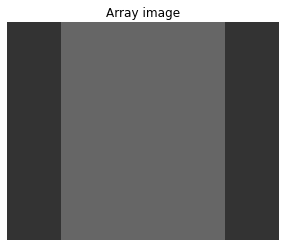

In [ ]:
img_array = np.array([[1, 2, 2, 2, 1], [1, 2, 2, 2, 1], [1, 2, 2, 2, 1], [1, 2, 2, 2, 1]])
plt.imshow(img_array, cmap="gray", vmin=0, vmax= 5)
plt.title("Array image")
plt.axis('off')
plt.show()

[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  1.  3.  5.  7.  8.]
 [ 0.  2.  6. 10. 14. 16.]
 [ 0.  3.  9. 15. 21. 24.]
 [ 0.  4. 12. 20. 28. 32.]]


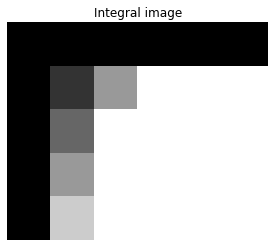

In [ ]:
ii_img_array = compute_integral_image(img_array)
print(ii_img_array)
plt.imshow(ii_img_array, cmap="gray", vmin=0, vmax= 5)
plt.title("Integral image")
plt.axis('off')
plt.show()

*   Test the function using 'camera' image from the data module. Plot the original image and the integral image.

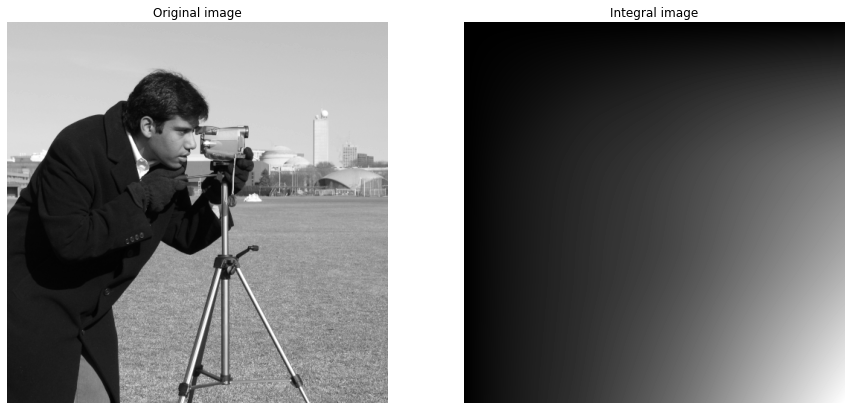

In [ ]:
# solution
image = data.camera()
ii_img_cam = compute_integral_image(image)
fig, plot = plt.subplots(1,2 , figsize=(15, 7))
plot[0].imshow(image, cmap='gray')
plot[0].set_title('Original image')
plot[0].axis('off')
plot[1].imshow(ii_img_cam, cmap='gray')
plot[1].set_title('Integral image')
plot[1].axis('off')
fig.show()


### Exercise #2

*   Create a function sum_region to compute the sum of the pixel intensities within a rectangle using the integral image. The rectangle will be defined using the top left (x, y) and bottom right (x, y) coordinates.

In [ ]:
def sum_region(integral_img_arr, top_left, bottom_right):

    # Add code here
    result = integral_img_arr[bottom_right[1], bottom_right[0]] + integral_img_arr[top_left[1], top_left[0]] - integral_img_arr[bottom_right[1], top_left[0]] - integral_img_arr[top_left[1], bottom_right[0]]
    
    return result

*   Make the following tests:

In [ ]:
# result you should get (12)
print(sum_region(ii_img_array, [1, 1], [3, 4]))

12.0


In [ ]:
# result you should get (32)
print(sum_region(ii_img_array, [0, 0], [-1, -1]))

32.0


### Exercise #3

*   Build a function load_integral_images to read all the images inside a given folder and compute the integral image of every image

In [ ]:
def load_integral_images(path):
    ii_images = []
    for _file in os.listdir(path):
        #### Complete here:
        #### Read image
        #### Remember to scale the images (with the max pixel intensity value)
        image = os.path.join(path, _file)
        if image.endswith('.png'):
          image = io.imread(image)
          image = image/np.linalg.norm(image)
          ii_images.append(compute_integral_image(image))
          

    return ii_images


# With this function we are reading each file in the folder, calculating its integral image and after that normalizing the image.
# Finally we put our processed image in the list that we will return

*   Use the load_integral_images function to compute the integral images of training and testing data

In [ ]:
# change paths to your location

root_dir = r'/content/drive/MyDrive/MAI/CV/LABS/CV6/images'

pos_training_path = os.path.join(root_dir, 'train_data/faces')
neg_training_path = os.path.join(root_dir, 'train_data/non_faces')
pos_testing_path = os.path.join(root_dir, 'test_data/faces')
neg_testing_path = os.path.join(root_dir, 'test_data/non_faces')




In [ ]:
# solution
train_data_faces = load_integral_images(pos_training_path)
train_data_non_faces = load_integral_images(neg_training_path)
test_data_faces = load_integral_images(pos_testing_path)
test_data_non_faces = load_integral_images(neg_testing_path)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# --- to avoid calculating them again ---
train_data_faces = np.array(train_data_faces)
train_data_non_faces = np.array(train_data_non_faces)
test_data_faces = np.array(test_data_faces)
test_data_non_faces = np.array(test_data_non_faces)
np.save(os.path.join(root_dir, 'train_data_faces'), train_data_faces)
np.save(os.path.join(root_dir, 'train_data_non_faces'), train_data_non_faces)
np.save(os.path.join(root_dir, 'test_data_faces'), test_data_faces)
np.save(os.path.join(root_dir, 'test_data_non_faces'), test_data_non_faces)




In [ ]:
# --- for load ---

train_data_faces = np.load(os.path.join(root_dir, 'train_data_faces.npy'))
train_data_non_faces = np.load(os.path.join(root_dir, 'train_data_non_faces.npy'))
test_data_faces = np.load(os.path.join(root_dir, 'test_data_faces.npy'))
test_data_non_faces = np.load(os.path.join(root_dir, 'test_data_non_faces.npy'))

*   Visualize a few original images and the corresponding integral images using matplotlib.

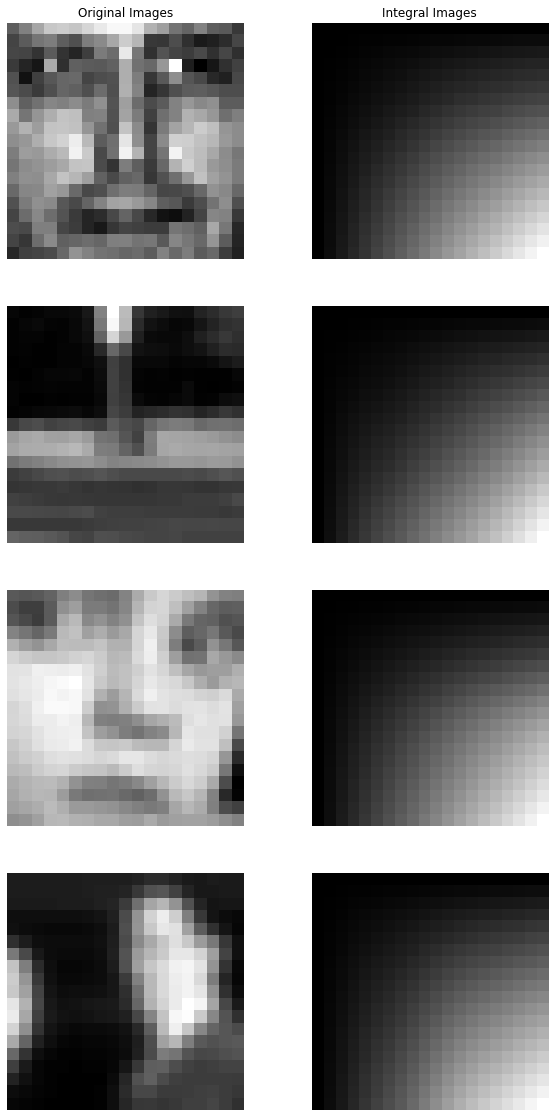

In [ ]:
#solution

fig, plot = plt.subplots(4,2, figsize=(10,20))
plot[0,0].imshow(io.imread("/content/drive/MyDrive/MAI/CV/LABS/CV6/images/train_data/faces/face00001.png"), cmap='gray')
plot[0,1].imshow(train_data_faces[0], cmap='gray')
plot[1,0].imshow(io.imread("/content/drive/MyDrive/MAI/CV/LABS/CV6/images/train_data/non_faces/B1_00001.png"), cmap='gray')
plot[1,1].imshow(train_data_non_faces[0], cmap='gray')
plot[2,0].imshow(io.imread("/content/drive/MyDrive/MAI/CV/LABS/CV6/images/test_data/faces/cmu_0000.png"), cmap='gray')
plot[2,1].imshow(test_data_faces[0], cmap='gray')
plot[3,0].imshow(io.imread("/content/drive/MyDrive/MAI/CV/LABS/CV6/images/test_data/non_faces/cmu_0000.png"), cmap='gray')
plot[3,1].imshow(test_data_non_faces[0], cmap='gray')

plot[0,0].axis('off')
plot[0,1].axis('off')
plot[1,0].axis('off')
plot[1,1].axis('off')
plot[2,0].axis('off')
plot[2,1].axis('off')
plot[3,0].axis('off')
plot[3,1].axis('off')

plot[0,0].set_title('Original Images')
plot[0,1].set_title('Integral Images')
fig.show()

### Exercise #4

*   Compute the Haar features of an image.
*   We provide you with HaarLikeFeature class that has build in a get_score function and a get_vote function. Your job is to complete the code of the method _create_features in the class HaarLikeFeature:

In [ ]:
def enum(**enums):
    return type('Enum', (), enums)

FeatureType = enum(TWO_VERTICAL=(1, 2), TWO_HORIZONTAL=(2, 1), THREE_HORIZONTAL=(3, 1), THREE_VERTICAL=(1, 3), FOUR=(2, 2))
FeatureTypes = [FeatureType.TWO_VERTICAL, FeatureType.TWO_HORIZONTAL, FeatureType.THREE_VERTICAL, FeatureType.THREE_HORIZONTAL, FeatureType.FOUR]

In [ ]:
class HaarLikeFeature(object):
    """
    Class representing a haar-like feature.
    """

    def __init__(self, feature_type, position, width, height, threshold, polarity):
        """
        Creates a new haar-like feature.
        :param feature_type: Type of new feature, see FeatureType enum
        :type feature_type: HaarLikeFeature.FeatureTypes
        :param position: Top left corner where the feature begins (x, y)
        :type position: (int, int)
        :param width: Width of the feature
        :type width: int
        :param height: Height of the feature
        :type height: int
        :param threshold: Feature threshold
        :type threshold: float
        :param polarity: polarity of the feature -1 or 1
        :type polarity: int
        """
        self.type = feature_type
        self.top_left = position
        self.bottom_right = (position[0] + width, position[1] + height)
        self.width = width
        self.height = height
        self.threshold = threshold
        self.polarity = polarity
        self.weight = 1
    
    def get_score(self, int_img):
        """
        Get score for given integral image array.
        :param int_img: Integral image array
        :type int_img: numpy.ndarray
        
        :return: Score for given feature
        :rtype: float
        """
        score = 0
        if self.type == FeatureType.TWO_VERTICAL:
            first = sum_region(int_img, self.top_left, (self.top_left[0] + self.width, int(self.top_left[1] + self.height / 2)))
            second = sum_region(int_img, (self.top_left[0], int(self.top_left[1] + self.height / 2)), self.bottom_right)
            score = first - second
        elif self.type == FeatureType.TWO_HORIZONTAL:
            first = sum_region(int_img, self.top_left, (int(self.top_left[0] + self.width / 2), self.top_left[1] + self.height))
            second = sum_region(int_img, (int(self.top_left[0] + self.width / 2), self.top_left[1]), self.bottom_right)
            score = first - second
        elif self.type == FeatureType.THREE_HORIZONTAL:
            first = sum_region(int_img, self.top_left, (int(self.top_left[0] + self.width / 3), self.top_left[1] + self.height))
            second = sum_region(int_img, (int(self.top_left[0] + self.width / 3), self.top_left[1]), (int(self.top_left[0] + 2 * self.width / 3), self.top_left[1] + self.height))
            third = sum_region(int_img, (int(self.top_left[0] + 2 * self.width / 3), self.top_left[1]), self.bottom_right)
            score = first - second + third
        elif self.type == FeatureType.THREE_VERTICAL:
            first = sum_region(int_img, self.top_left, (self.bottom_right[0], int(self.top_left[1] + self.height / 3)))
            second = sum_region(int_img, (self.top_left[0], int(self.top_left[1] + self.height / 3)), (self.bottom_right[0], int(self.top_left[1] + 2 * self.height / 3)))
            third = sum_region(int_img, (self.top_left[0], int(self.top_left[1] + 2 * self.height / 3)), self.bottom_right)
            score = first - second + third
        elif self.type == FeatureType.FOUR:
            # top left area
            first = sum_region(int_img, self.top_left, (int(self.top_left[0] + self.width / 2), int(self.top_left[1] + self.height / 2)))
            # top right area
            second = sum_region(int_img, (int(self.top_left[0] + self.width / 2), self.top_left[1]), (self.bottom_right[0], int(self.top_left[1] + self.height / 2)))
            # bottom left area
            third = sum_region(int_img, (self.top_left[0], int(self.top_left[1] + self.height / 2)), (int(self.top_left[0] + self.width / 2), self.bottom_right[1]))
            # bottom right area
            fourth = sum_region(int_img, (int(self.top_left[0] + self.width / 2), int(self.top_left[1] + self.height / 2)), self.bottom_right)
            score = first - second - third + fourth
        return score
    
    def get_vote(self, int_img):
        """
        Get vote of this feature for given integral image.
        :param int_img: Integral image array
        :type int_img: numpy.ndarray
        
        :return: 1 iff this feature votes positively, otherwise -1
        :rtype: int
        """

        score = self.get_score(int_img)
        return self.weight * (1 if score < self.polarity * self.threshold else -1)

In [ ]:
def learn(positive_iis, negative_iis, num_classifiers=-1, min_feature_width=1, max_feature_width=-1, min_feature_height=1, max_feature_height=-1):
    """
    Selects a set of classifiers. Iteratively takes the best classifiers based
    on a weighted error.
    :param positive_iis: List of positive integral image examples
    :type positive_iis: list[numpy.ndarray]
    :param negative_iis: List of negative integral image examples
    :type negative_iis: list[numpy.ndarray]
    :param num_classifiers: Number of classifiers to select, -1 will use all
    classifiers
    :type num_classifiers: int
    
    :return: List of selected features
    :rtype: list[HaarLikeFeature.HaarLikeFeature]
    """
    num_pos = len(positive_iis)
    num_neg = len(negative_iis)
    num_imgs = num_pos + num_neg
    img_height, img_width = positive_iis[0].shape

    # Maximum feature width and height default to image width and height
    max_feature_height = img_height if max_feature_height == -1 else max_feature_height
    max_feature_width = img_width if max_feature_width == -1 else max_feature_width

    # Create initial weights and labels
    pos_weights = np.ones(num_pos) * 1. / (2 * num_pos)
    neg_weights = np.ones(num_neg) * 1. / (2 * num_neg)
    weights = np.hstack((pos_weights, neg_weights))
    labels = np.hstack((np.ones(num_pos), np.ones(num_neg) * -1)) 

    #images = positive_iis + negative_iis
    images = np.concatenate((positive_iis, negative_iis))


    # Create features for all sizes and locations
    features = _create_features(img_height, img_width, min_feature_width, max_feature_width, min_feature_height, max_feature_height)
    num_features = len(features)
    feature_indexes = list(range(num_features))

    num_classifiers = num_features if num_classifiers == -1 else num_classifiers

    print('Calculating scores for images..')
    t0 = time.time()
    votes = np.zeros((num_imgs, num_features))
    # Use as many workers as there are CPUs
    pool = Pool(processes=8)
    for i in range(num_imgs):
        votes[i, :] = np.array(list(pool.map(partial(_get_feature_vote, image=images[i]), features))) #l'error esta aqui    
    
    print('\tTime needed for calculating scores:', time.time()-t0)
    
    # select classifiers
    classifiers = []

    t0 = time.time()
    print('Selecting classifiers..')
    for _ in range(num_classifiers):
        
        classification_errors = np.zeros(len(feature_indexes))

        # normalize weights
        weights *= 1. / np.sum(weights)

        # select best classifier based on the weighted error
        for f in range(len(feature_indexes)):
            f_idx = feature_indexes[f]
            # classifier error is the sum of image weights where the classifier
            # is right
            error = sum(map(lambda img_idx: weights[img_idx] if labels[img_idx] != votes[img_idx, f_idx] else 0, range(num_imgs)))
            classification_errors[f] = error

        # get best feature, i.e. with smallest error
        min_error_idx = np.argmin(classification_errors)
        best_error = classification_errors[min_error_idx]
        best_feature_idx = feature_indexes[min_error_idx]

        # set feature weight
        best_feature = features[best_feature_idx]
        feature_weight = 0.5 * np.log((1 - best_error) / best_error)
        best_feature.weight = feature_weight

        classifiers.append(best_feature)

        # update image weights
        weights = np.array(list(map(lambda img_idx: weights[img_idx] * np.sqrt((1-best_error)/best_error) if labels[img_idx] != votes[img_idx, best_feature_idx] else weights[img_idx] * np.sqrt(best_error/(1-best_error)), range(num_imgs))))

        # remove feature (a feature can't be selected twice)
        feature_indexes.remove(best_feature_idx)

    print('\tTime needed for Selecting Classifiers:', time.time()-t0,'\n')

    return classifiers


def _get_feature_vote(feature, image):
    return feature.get_vote(image)


def _create_features(img_height, img_width, min_feature_width, max_feature_width, min_feature_height, max_feature_height):
    print('Creating Haar-like features..')
    t0 = time.time()
    features = []
    for feature in FeatureTypes:
        # FeatureTypes are just tuples
        feature_start_width = max(min_feature_width, feature[0])
        for feature_width in range(feature_start_width, max_feature_width, feature[0]):
            feature_start_height = max(min_feature_height, feature[1])
            for feature_height in range(feature_start_height, max_feature_height, feature[1]):
              for x in range((img_width - feature_width)):
                for y in range((img_height - feature_height)):
                  features.append(HaarLikeFeature(feature, (x,y), feature_width, feature_height, 1, 1))
            
    print('\t' + str(len(features)) + ' features created.')
    print('\tTime needed for calculating Haar-like features:', time.time()-t0)
    return features

### Exercise #5

*   Use the learn method to learn a list of two classifiers with the train data. With the learn function you can build a list of classifiers that detect whether an image contains a face or not.

*   Use the following hyperparameters of the features and num_classifiers

In [ ]:
num_classifiers = 2
min_feature_height = 8
max_feature_height = 10
min_feature_width = 8
max_feature_width = 10

In [ ]:
# solution

%%time 

classifiers = learn(train_data_faces, train_data_non_faces, num_classifiers, min_feature_width, max_feature_width, min_feature_height, max_feature_height)

Creating Haar-like features..
	1248 features created.
	Time needed for calculating Haar-like features: 0.0036542415618896484
Calculating scores for images..
	Time needed for calculating scores: 190.70113277435303
Selecting classifiers..
	Time needed for Selecting Classifiers: 21.54189395904541 

CPU times: user 1min 27s, sys: 6.04 s, total: 1min 33s
Wall time: 3min 32s


### Exercise #6

*   Make a function for voting with different classifiers
*   Build two functions ensemble_vote and ensemble_vote_all.
*   **ensemble_vote(int_img, classifiers)** has to return a 1 if the majority of the votes of the classifiers is positive and a zero otherwise
*   **ensemble_vote_all(int_imgs, classifiers)** has to loop over the list int_imgs and compute the ensemble_vote for each image in the list. It has to return a list containing all the votes for all the images in int_imgs.


In [ ]:
# solution
def ensemble_vote(int_img, classifiers):
  count=0
  for i in range(num_classifiers):
    if classifiers[i].get_vote(int_img)>0:
      count+=1
    else:
      count-=1
  if count > 0:
    return 1
  else:
    return 0


def ensemble_vote_all(int_imgs, classifiers):
  results = []
  for img in int_imgs:
    results.append(ensemble_vote(img, classifiers))
  
  return results


*   Use the functions to compute the train and test acurracies for faces and non faces.
*   Print the results in the following format:

```
train results:
Correctly identified Faces: 2129/2429  (87.64923836969946%)
Correctly identified non-Faces: 4276/8548  (50.02339728591484%)

test results:
Correctly identified Faces: 300/472  (63.559322033898304%)
Correctly identified non-Faces: 74/128  (57.8125%)
```

*   It is not required to get this exact results but print the information in this format. It facilitates understanding the results.

In [ ]:
# solutiontrain_data_faces, train_data_non_faces
CIF=sum(ensemble_vote_all(train_data_faces, classifiers))
Tr=len(train_data_faces)
NTr=len(train_data_non_faces)
CINF=NTr-sum(ensemble_vote_all(train_data_non_faces, classifiers))

CIFt=sum(ensemble_vote_all(test_data_faces, classifiers))
Te=len(test_data_faces)
NTe=len(test_data_non_faces)
CINFt=NTe-sum(ensemble_vote_all(test_data_non_faces, classifiers))

print('train results:')
print('Correctly identified Faces:', CIF, '/', Tr, (CIF/Tr)*100, '%' )
print('Correctly identified non-Faces:', CINF, '/', NTr, (CINF/NTr)*100, '%' )

print('\ntest results:')
print('Correctly identified Faces:', CIFt, '/', Te, (CIFt/Te)*100, '%' )
print('Correctly identified non-Faces:', CINFt, '/', NTe, (CINFt/NTe)*100, '%' )


train results:
Correctly identified Faces: 2351 / 2429 96.78880197612186 %
Correctly identified non-Faces: 3967 / 8555 46.37054354178843 %

test results:
Correctly identified Faces: 338 / 472 71.61016949152543 %
Correctly identified non-Faces: 76 / 128 59.375 %


### Exercise #7

*   Make another test with 20 classifiers instead of 2.
*   Inspect the classification results if you use adaboost with 20 classifiers. *   Use the same hyperameters for the features. Print the results as in the previous exercise.

In [ ]:
num_classifiers = 20
min_feature_height = 8
max_feature_height = 10
min_feature_width = 8
max_feature_width = 10

In [ ]:
# solution

%%time 

classifiers_20 = learn(train_data_faces, train_data_non_faces, num_classifiers, min_feature_width, max_feature_width, min_feature_height, max_feature_height)

Creating Haar-like features..
	1248 features created.
	Time needed for calculating Haar-like features: 0.003194093704223633
Calculating scores for images..
	Time needed for calculating scores: 191.05147409439087
Selecting classifiers..
	Time needed for Selecting Classifiers: 212.2203311920166 

CPU times: user 4min 37s, sys: 6.59 s, total: 4min 44s
Wall time: 6min 43s


In [ ]:
CIF=sum(ensemble_vote_all(train_data_faces, classifiers_20))
Tr=len(train_data_faces)
NTr=len(train_data_non_faces)
CINF=NTr-sum(ensemble_vote_all(train_data_non_faces, classifiers_20))

CIFt=sum(ensemble_vote_all(test_data_faces, classifiers_20))
Te=len(test_data_faces)
NTe=len(test_data_non_faces)
CINFt=NTe-sum(ensemble_vote_all(test_data_non_faces, classifiers_20))

print('train results:')
print('Correctly identified Faces:', CIF, '/', Tr, (CIF/Tr)*100, '%' )
print('Correctly identified non-Faces:', CINF, '/', NTr, (CINF/NTr)*100, '%' )

print('\ntest results:')
print('Correctly identified Faces:', CIFt, '/', Te, (CIFt/Te)*100, '%' )
print('Correctly identified non-Faces:', CINFt, '/', NTe, (CINFt/NTe)*100, '%' )

train results:
Correctly identified Faces: 27 / 2429 1.1115685467270482 %
Correctly identified non-Faces: 6775 / 8555 79.19345412039743 %

test results:
Correctly identified Faces: 33 / 472 6.991525423728813 %
Correctly identified non-Faces: 106 / 128 82.8125 %


*   Discuss if the classification results improved in the train data.


**Solution**

We can see that the number of correctly classified faces has decreased a lot and the number of correctly identified non-faces has improved considerably. However, if the aim of the algorithm is to detect Faces, with this low percentage of identified faces we do not achieve it too much. Therefore, it is better to classify with only two classifiers, a part that requires less time.

### Exercise #8

*   Change the voting functions so that you can set a threshold for deciding a prediction.
*   The threshold value indicates the minimum score for assigning a "positive" label (detect a face).
*   Create the following functions
    *   ensemble_vote_t: returns the final decision of a list of classifiers for a given threshold.
    *   ensemble_vote_all_t: Iterates over a list of integral images and returns the final decision of a list of classifiers for each of the images (for a given threshold).

In [ ]:
# solution
def ensemble_vote_t(int_img, classifiers, threshold):
  count=0
  for i in range(num_classifiers):
    classifiers[i].threshold=threshold
    if classifiers[i].get_vote(int_img)>0:
      count+=1
    else:
      count-=1
  if count > 0:
    return 1
  else:
    return 0


def ensemble_vote_all_t(int_imgs, classifiers, threshold):
  results = []
  for img in int_imgs:
    results.append(ensemble_vote_t(img, classifiers, threshold))
  
  return results


*   Using the list of 20 classifiers compute the following:

    1.   number of correct faces over all faces (in the train data)
    2.   number of correct non faces over all non faces (in the train data)
    3.   number of correct faces over all faces (in the test data)
    4.   number of correct non faces over all non faces (in the test data)

*   The quantities have to be computed for each of the following thresholds:
```
thresholds = np.array([x for x in range(-5,5,1)])/10.
```

In [ ]:
# solution
thresholds = np.array([x for x in range(-5,5,1)])/10.

F=[]; NF=[]; CF=[]; CNF=[];
Ft=[]; NFt=[]; CFt=[]; CNFt=[];

for threshold in thresholds:
  F.append(len(train_data_faces))
  NF.append(len(train_data_non_faces))
  CF.append(sum(ensemble_vote_all_t(train_data_faces, classifiers_20, threshold)))
  CNF.append(len(train_data_non_faces)-sum(ensemble_vote_all_t(train_data_non_faces, classifiers_20, threshold)))

  Ft.append(len(test_data_faces))
  NFt.append(len(test_data_non_faces))
  CFt.append(sum(ensemble_vote_all_t(test_data_faces, classifiers_20, threshold)))
  CNFt.append(len(test_data_non_faces)-sum(ensemble_vote_all_t(test_data_non_faces, classifiers_20, threshold)))

  print('\nthreshold =', threshold)
  #1
  print('number of correct faces over all faces (in the train data):\t\t', CF[-1], '/', F[-1], '=', round(CF[-1] / F[-1],4))
  #2
  print('number of correct non faces over all non faces (in the train data):\t', CNF[-1], '/', NF[-1], '=', round(CNF[-1] / NF[-1],4))
  #3
  print('number of correct faces over all faces (in the test data):\t\t', CFt[-1], '/', Ft[-1], '=', round(CFt[-1] / Ft[-1],4))
  #4
  print('number of correct non faces over all non faces (in the test data):\t', CNFt[-1], '/', NFt[-1], '=', round(CNFt[-1] / NFt[-1],4))


threshold = -0.5
number of correct faces over all faces (in the train data):		 2425 / 2429 = 0.9984
number of correct non faces over all non faces (in the train data):	 7 / 8555 = 0.0008
number of correct faces over all faces (in the test data):		 472 / 472 = 1.0
number of correct non faces over all non faces (in the test data):	 0 / 128 = 0.0

threshold = -0.4
number of correct faces over all faces (in the train data):		 2421 / 2429 = 0.9967
number of correct non faces over all non faces (in the train data):	 9 / 8555 = 0.0011
number of correct faces over all faces (in the test data):		 472 / 472 = 1.0
number of correct non faces over all non faces (in the test data):	 0 / 128 = 0.0

threshold = -0.3
number of correct faces over all faces (in the train data):		 2419 / 2429 = 0.9959
number of correct non faces over all non faces (in the train data):	 14 / 8555 = 0.0016
number of correct faces over all faces (in the test data):		 472 / 472 = 1.0
number of correct non faces over all non

*   Make a bar plot for 1-4. In the x axis write the threshold value.

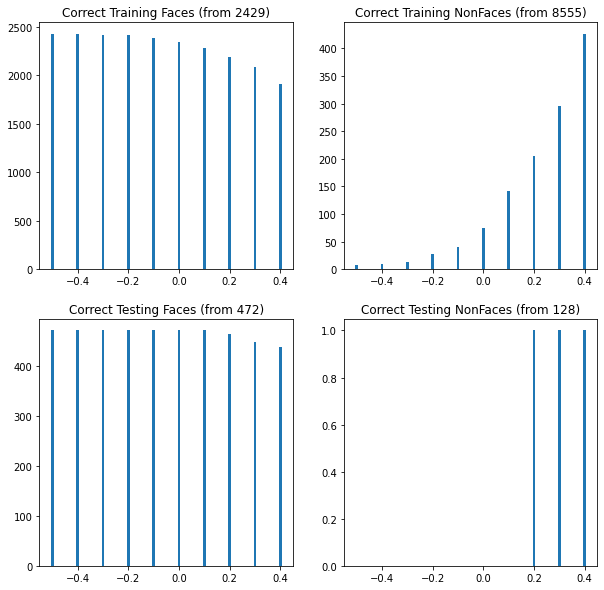

In [ ]:
# solution
fig, plot =plt.subplots(2,2, figsize=(10,10))
plot[0,0].bar(thresholds, CF, width=0.01)
plot[0,0].set_title('Correct Training Faces (from 2429)')
plot[0,1].bar(thresholds, CNF, width=0.01)
plot[0,1].set_title('Correct Training NonFaces (from 8555)')
plot[1,0].bar(thresholds, CFt, width=0.01)
plot[1,0].set_title('Correct Testing Faces (from 472)')
plot[1,1].bar(thresholds, CNFt, width=0.01)
plot[1,1].set_title('Correct Testing NonFaces (from 128)')

fig.show()

*   Discuss what happens when you increase the threshold value.

**Solution**

When we increase the threshold value the number of correctly detected faces decreases, and the number of correctly detected non faces increases.

# Face Recognition using PCA


In [ ]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

from time import time
import logging
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

*   Loading the dataset

In [ ]:
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


*   Creating training and testing set

In [ ]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('Train data shape:', X_train.shape)
print('Test data shape:', X_test.shape)
print('Number of classes in Train set:', np.unique(y_train).shape[0])

Train data shape: (966, 1850)
Test data shape: (322, 1850)
Number of classes in Train set: 7


### Exercise #1: PCA Computation
*   Compute a PCA (eigenfaces) on the face dataset
    *   *Set* number of components to 100

In [ ]:
# solution
pca = PCA(n_components=100)
pca.fit(X_train)


PCA(n_components=100)

*   Reshape the components output of pca to obtain the eigen faces

In [ ]:
# solution
array = pca.components_.reshape((-1,h, w))

*   Project the training and testing faces data on the orthonormal basis

In [ ]:
# solution
ort_train=pca.transform(X_train)
ort_test=pca.transform(X_test)

*   Plot the most significative eigenfaces (Show the top 12 eigenfaces) as a matplotlib

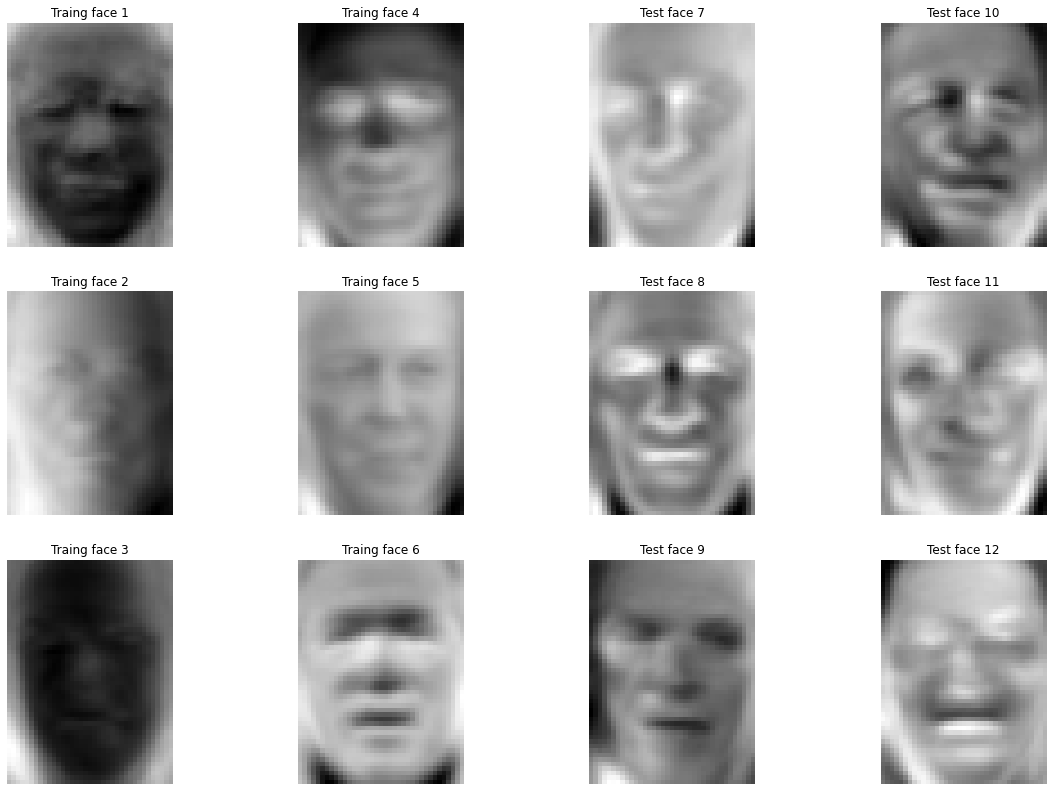

In [ ]:
# solution
fig, plot = plt.subplots(3,4, figsize= (20,14))
count = 1
for j in range(2):
  for i in range(3):
    plot[i][j].imshow(array[count-1], cmap='gray')
    plot[i][j].title.set_text('Traing face ' + str(count))
    plot[i][j].axis('off')
    plot[i][j+2].imshow(array[5+count], cmap='gray')
    plot[i][j+2].title.set_text('Test face ' + str(count+6))
    plot[i][j+2].axis('off')
    count += 1


*   Show the total percentage of variance explained by the selected components of the PCA.


In [ ]:
# solution
variance=pca.explained_variance_ratio_
sum(variance)*100

92.8306506946683

*   What are the shortcomings of PCA?

**Solution**

The main disadvantages of PCA are, for one side, that as the new variables are combinations of the others, they may be more difficult to interpret; and that, as we reduce the dimensionality of data, we lose information (although not much).

### Exercise #2: k-NN Classification

*   Train a k-nearest neighbor model with the eigenfaces using the default parameters

In [ ]:
# solution
knn = KNeighborsClassifier()
knn.fit(ort_train, y_train)


KNeighborsClassifier()

*   Predict the test data using the trained classifier

In [ ]:
# Quantitative evaluation of the model quality on the test set

predictions = knn.predict(ort_train)
print('Labels: ', y_train)
print('Predictions: ', predictions)
print('Accuracy: ', knn.score(ort_train, y_train)) #sum(y_test==predictions)/ len(y_test)

Labels:  [3 1 2 6 4 6 2 6 4 5 2 2 4 1 6 2 1 3 2 3 6 3 3 6 1 3 0 1 6 5 4 5 3 0 3 1 6
 3 6 2 3 0 1 1 3 6 3 3 3 3 5 6 4 3 3 0 1 3 6 4 3 3 6 6 0 3 6 0 2 5 3 1 2 6
 3 3 1 3 5 2 2 3 1 0 3 1 5 1 6 5 3 3 1 4 1 3 3 1 3 0 1 1 4 3 1 3 3 2 3 3 3
 3 5 1 3 2 6 2 3 3 3 4 5 1 6 3 3 3 1 4 1 3 0 3 3 1 3 6 3 3 6 3 3 3 3 3 1 6
 4 2 6 3 3 4 5 3 0 3 3 1 4 6 1 3 1 5 3 2 2 5 3 3 1 2 4 2 0 1 3 4 3 3 3 3 3
 3 6 1 3 0 0 5 3 5 6 0 3 2 3 3 3 6 3 1 3 5 2 3 6 3 3 6 3 3 0 3 3 3 3 6 0 1
 3 1 1 2 3 2 3 1 3 3 2 1 4 2 1 3 3 1 1 1 5 5 2 5 3 3 3 3 6 3 5 2 3 3 4 3 3
 3 0 0 3 0 4 1 1 5 6 5 3 3 3 0 2 3 3 2 3 6 3 2 3 2 3 0 0 6 1 0 3 1 0 4 1 3
 4 4 3 3 2 1 3 1 0 3 2 2 3 2 1 4 3 2 1 3 0 3 3 6 3 3 3 3 1 1 1 3 2 0 1 3 3
 1 5 3 3 6 3 3 3 1 6 5 3 4 3 3 1 2 5 6 3 6 3 3 3 3 3 6 6 3 3 1 1 1 3 3 2 3
 3 3 4 3 3 3 3 3 3 1 2 3 2 3 3 2 5 1 5 4 6 1 3 1 3 1 3 0 3 0 3 1 6 4 2 3 6
 1 4 3 3 0 1 0 4 5 1 3 4 5 6 5 4 0 6 1 3 6 3 3 4 6 1 3 1 3 4 3 3 3 5 2 2 4
 2 3 2 1 6 4 1 2 3 4 5 3 3 6 3 4 1 5 0 3 1 3 1 1 6 0 2 3 3 3 3 1 6 4 3 3 3
 3 6 2 6 0 3 0 4

### Exercise #3: Quantitative results

*   Compute accuracy, classification report and confusion matrix of the trained classifier

In [ ]:
# solution
print('Accuracy with training: ', knn.score(ort_train, y_train))

Accuracy with training:  0.7132505175983437


In [93]:
# solution
print('Classification report training: \n', classification_report(y_train, knn.predict(ort_train)))

Classification report training: 
               precision    recall  f1-score   support

           0       0.63      0.59      0.61        64
           1       0.66      0.87      0.75       176
           2       0.69      0.61      0.64        94
           3       0.74      0.88      0.80       384
           4       0.65      0.43      0.52        84
           5       0.81      0.46      0.59        56
           6       0.86      0.41      0.55       108

    accuracy                           0.71       966
   macro avg       0.72      0.61      0.64       966
weighted avg       0.72      0.71      0.70       966



In [ ]:
# solution
print('Confusion matrix training:\n', confusion_matrix(y_train, knn.predict(ort_train)))


Confusion matrix training:
 [[ 38  11   3  11   1   0   0]
 [  6 153   4  13   0   0   0]
 [  3  15  58  15   1   0   2]
 [  6  24  10 335   5   3   1]
 [  2  10   6  26  35   2   3]
 [  2   5   0  18   4  26   1]
 [  3  11   4  36   8   2  44]]


*   Explain the measures showed in the classification report.
*   Discuss the obtained classification results, both the quantitative as well as the qualitative results.

**Solution**

**Measures in the classification report:**

* precision: ratio of true positives to the sum of true and false positives  
* recall: ratio of true positives to the sum of true positives and false negatives
* f1-score: weighted harmonic mean of precision and recall  
* support: number of actual occurrences of the class in the dataset

We can realize that the obtained results are quite good but not enough, sometimes they fail. Precision indicates that in each group, between 68 and 87 % of the classificated images correspond to that group. Recall, which in general is a little lower, indicates that in each group between 42 and 88 % of the instances are well classified. F1-score indicates that group 3 is the one with better overall classification (80%) and group 4 the worst (53%). On average, we have a 72% of accuracy, which means that 72% of the time faces are well classified. In Exercise #5 we will see the qualitative results.


### Exercise #4

*   How is the optimal value of 'k' found?

**Solution**

To find the optimal 'k' we can select a range of values for 'k' (e.g. (2,15)) and then iterate over all values and choose the one with higher accuracy. If we find that the extreme value of the range is the best, we modify the range and repeat again until accuracy is established inside a range interval. 


*   Use GridSearch to find the optimal value of 'k'.
    *   *Hint: GridSearchCV is available in sklearn.model_selection*
*   What is the accuracy of the best estimator?

In [88]:
# solution
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, return_train_score=False,verbose=1)
grid.fit(X_train, y_train)


Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             verbose=1)

In [86]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 8}
0.565259879725086


### Exercise #5: Qualitative evaluation

*   Plot some of the prediction images using matplotlib subplots (4 x 4). Show the true label and predicted label as the title of each sub plot.

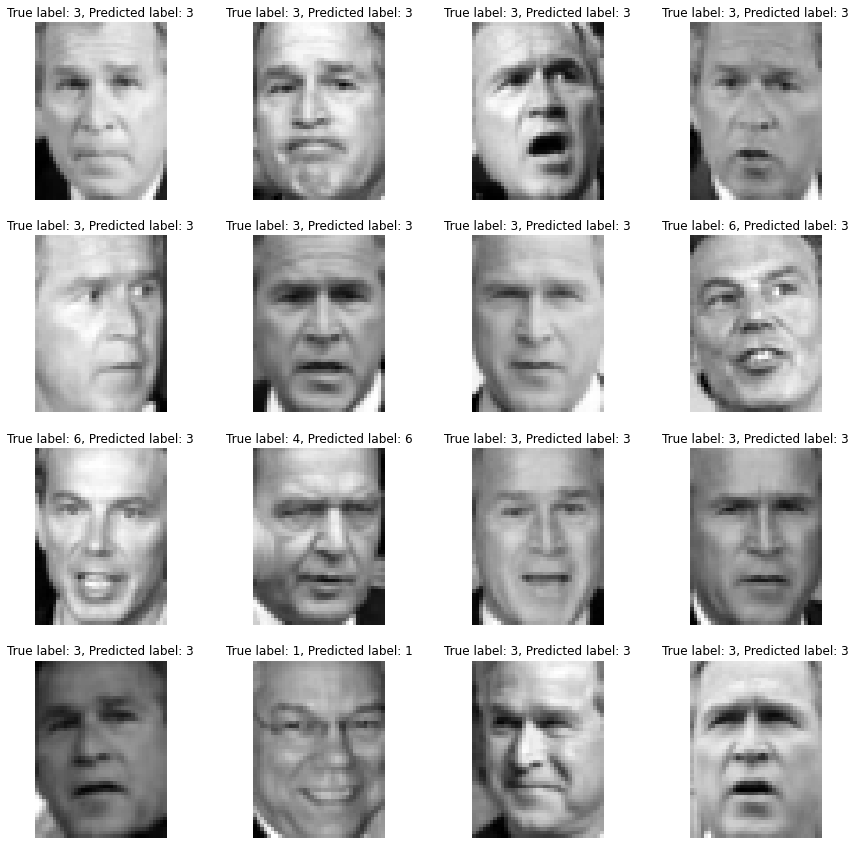

In [ ]:
# solution
fig, plot = plt.subplots(4,4, figsize=(15,15))
predictions=grid.predict(X_test)
for i in range(4):
  for j in range(4):
    plot[i,j].imshow(X_test.reshape(-1, h, w)[i+4*j], cmap='gray')
    plot[i,j].set_title('True label: ' + str(y_test[i+4*j]) + ', Predicted label: ' + str(predictions[i+4*j]))
    plot[i,j].axis('off')
    


*   What are the disadvantages of using kNN

**Solution**

Accuracy depends on the quality of the data.

With large data, the prediction stage might be slow.

Sensitive to the scale of the data and irrelevant features.

Require high memory – need to store all of the training data.

Given that it stores all of the training, it can be computationally expensive.


---

# **End of P3: Face Detection and Recognition**
Deadline for P3 submission in CampusVirtual is: **Monday, the 22nd of November, 2021**